<a href="https://colab.research.google.com/github/harishmohan83/text-util-service/blob/master/assignment3_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sea

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve



for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/assignment1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/assignment1/winequality-white.csv')

# print(list(df.columns))
data.columns = [col.strip().replace(' ', '_') for col in data.columns]

data.head(5)

/content/drive/MyDrive/Colab Notebooks/assignment1/diabetes.csv
/content/drive/MyDrive/Colab Notebooks/assignment1/.DS_Store
/content/drive/MyDrive/Colab Notebooks/assignment1/winequality-white.csv
/content/drive/MyDrive/Colab Notebooks/assignment1/winequality-red.csv


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
# cols = data.columns

# fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(12, 30))
# axs = np.ravel(axs)

# for i, col in enumerate(cols):
#     plt.sca(axs[i])
#     sea.histplot(data=data, x=col,
#                  kde=True, fill=True,
#                  line_kws={'lw':2,'ls':'--','color':'k'},
#                  color='orange')
#     plt.title(f"{col} distribution plot", fontdict={'size':16,'color':'k'})

# plt.tight_layout()
# plt.show()

In [3]:
# def plot_box_swarm(data=data, x='quality', y=None):
#     fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
#     sea.boxplot(data=data, x=x, y=y, ax=axs)
#     # sea.swarmplot(data=data, x=x, y=y, ax=axs[1])
#     plt.show()

# for col in data.columns.tolist()[:]:
#     plot_box_swarm(data=data, y=col)

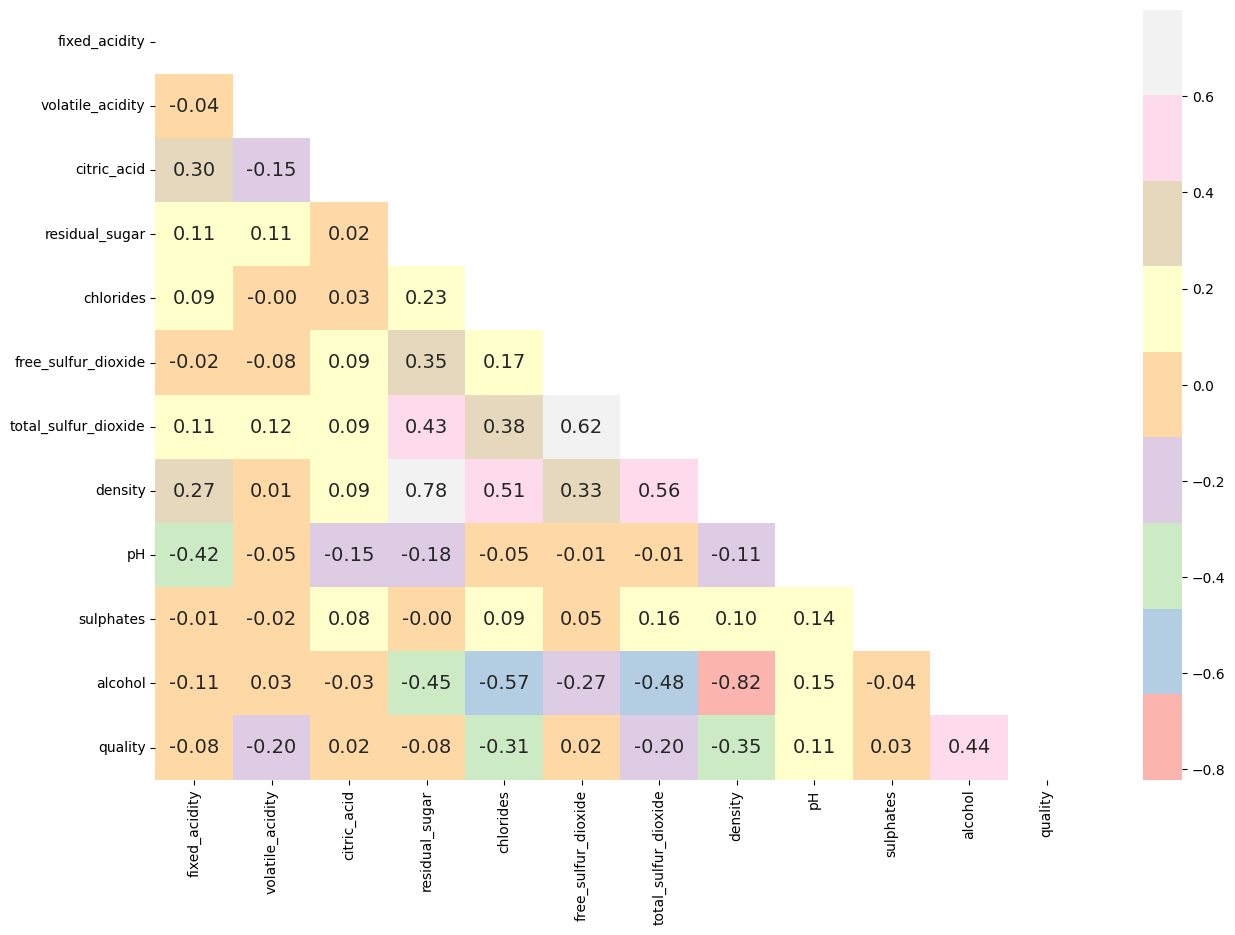

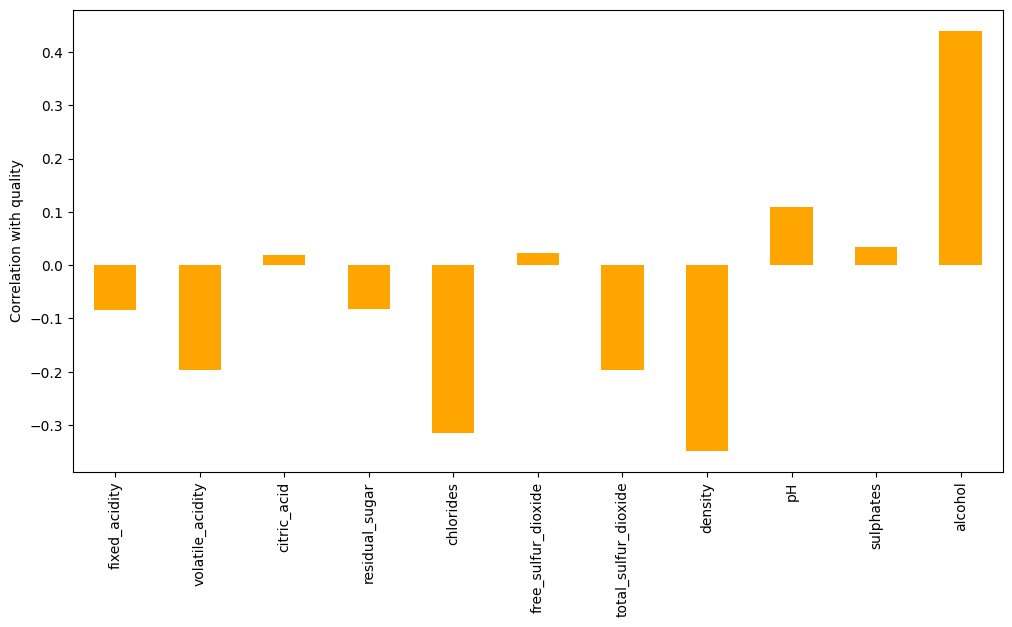

In [4]:
# corr_matrix = pd.concat([train_X, train_Y], axis=1).corr()
corr_matrix = data.corr(method='spearman')

plt.figure(figsize=(15,10))
sea.heatmap(corr_matrix,
            annot=True, annot_kws={'size':14},
            fmt='.2f', cmap='Pastel1',
            mask=np.triu(corr_matrix))
plt.show()

corr_matrix['quality'][:-1].plot.bar(color='orange', figsize=(12,6))
plt.ylabel("Correlation with quality")
plt.show()


In [5]:
# data_new = data
data_new = data.loc[~(data.fixed_acidity>11)
                 |(data.volatile_acidity>0.8)
                 |(data.citric_acid>1.1)
                 |(data.residual_sugar>30)
                 |(data.chlorides>0.25)
                 |(data.free_sulfur_dioxide>150)
                 |(data.total_sulfur_dioxide>300)
                 |(data.density>1.01)]
data_new = pd.DataFrame(data_new, columns = data.columns)

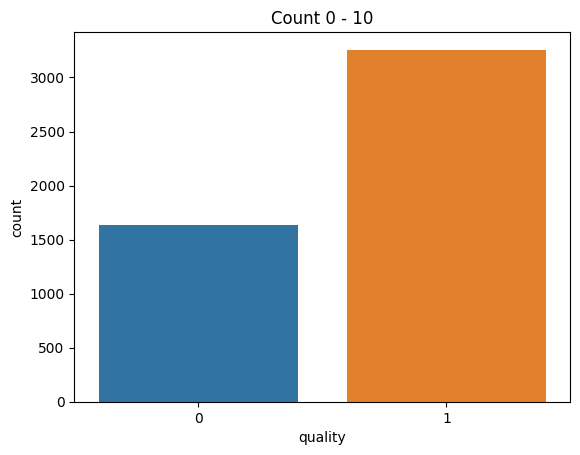

In [6]:
pd.options.mode.chained_assignment = None

# sea.countplot(x='quality', data=data)
# plt.title("Count 0 - 10")
# plt.show()

data_X = data_new.loc[:, data_new.columns != "quality"]
data_Y = data_new[["quality"]]
data_Y=data_Y['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)
data_Y = pd.DataFrame(data_Y, columns = ["quality"])

sea.countplot(x='quality', data=data_Y)
plt.title("Count 0 - 10")
plt.show()

train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size = 0.2, stratify=data_Y, random_state = 0)
train_X.reset_index(drop=True, inplace=True);
test_X.reset_index(drop=True, inplace=True);
train_Y.reset_index(drop=True, inplace=True);
test_Y.reset_index(drop=True, inplace=True);



In [7]:
# from sklearn.preprocessing import MinMaxScaler
# feature_names = train_X.columns
# scaler = StandardScaler()
# train_X = scaler.fit_transform(train_X)
# train_X = pd.DataFrame(train_X, columns = feature_names)

# test_X = scaler.transform(test_X)
# test_X = pd.DataFrame(test_X, columns = feature_names)
# test_X.head()

<ipython-input-8-996694a699e3>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))


Text(0.5, 1.0, 'Wine Dataset')

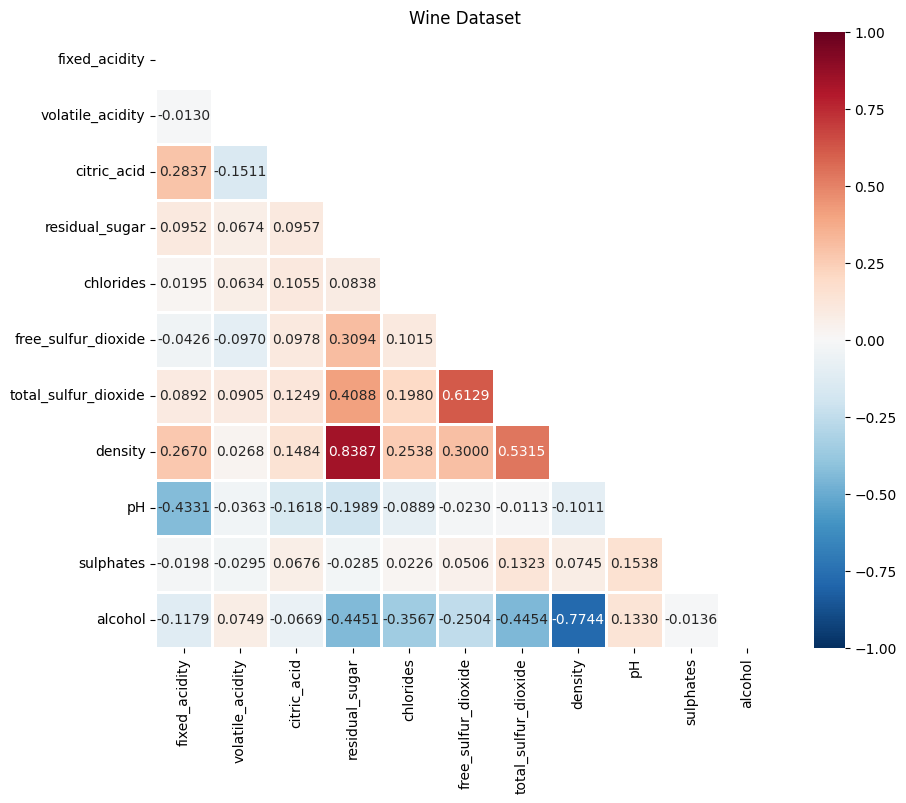

In [8]:
corr_matrix = pd.concat([train_X], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(10,8))
sea.heatmap(corr_matrix,annot=True, fmt=".4f",
            vmin=-1, vmax=1, linewidth = 1,
            center=0, mask=mask,cmap="RdBu_r");
plt.title("Wine Dataset")


Text(0.5, 1.0, 'Wine Dataset Pair Plot')

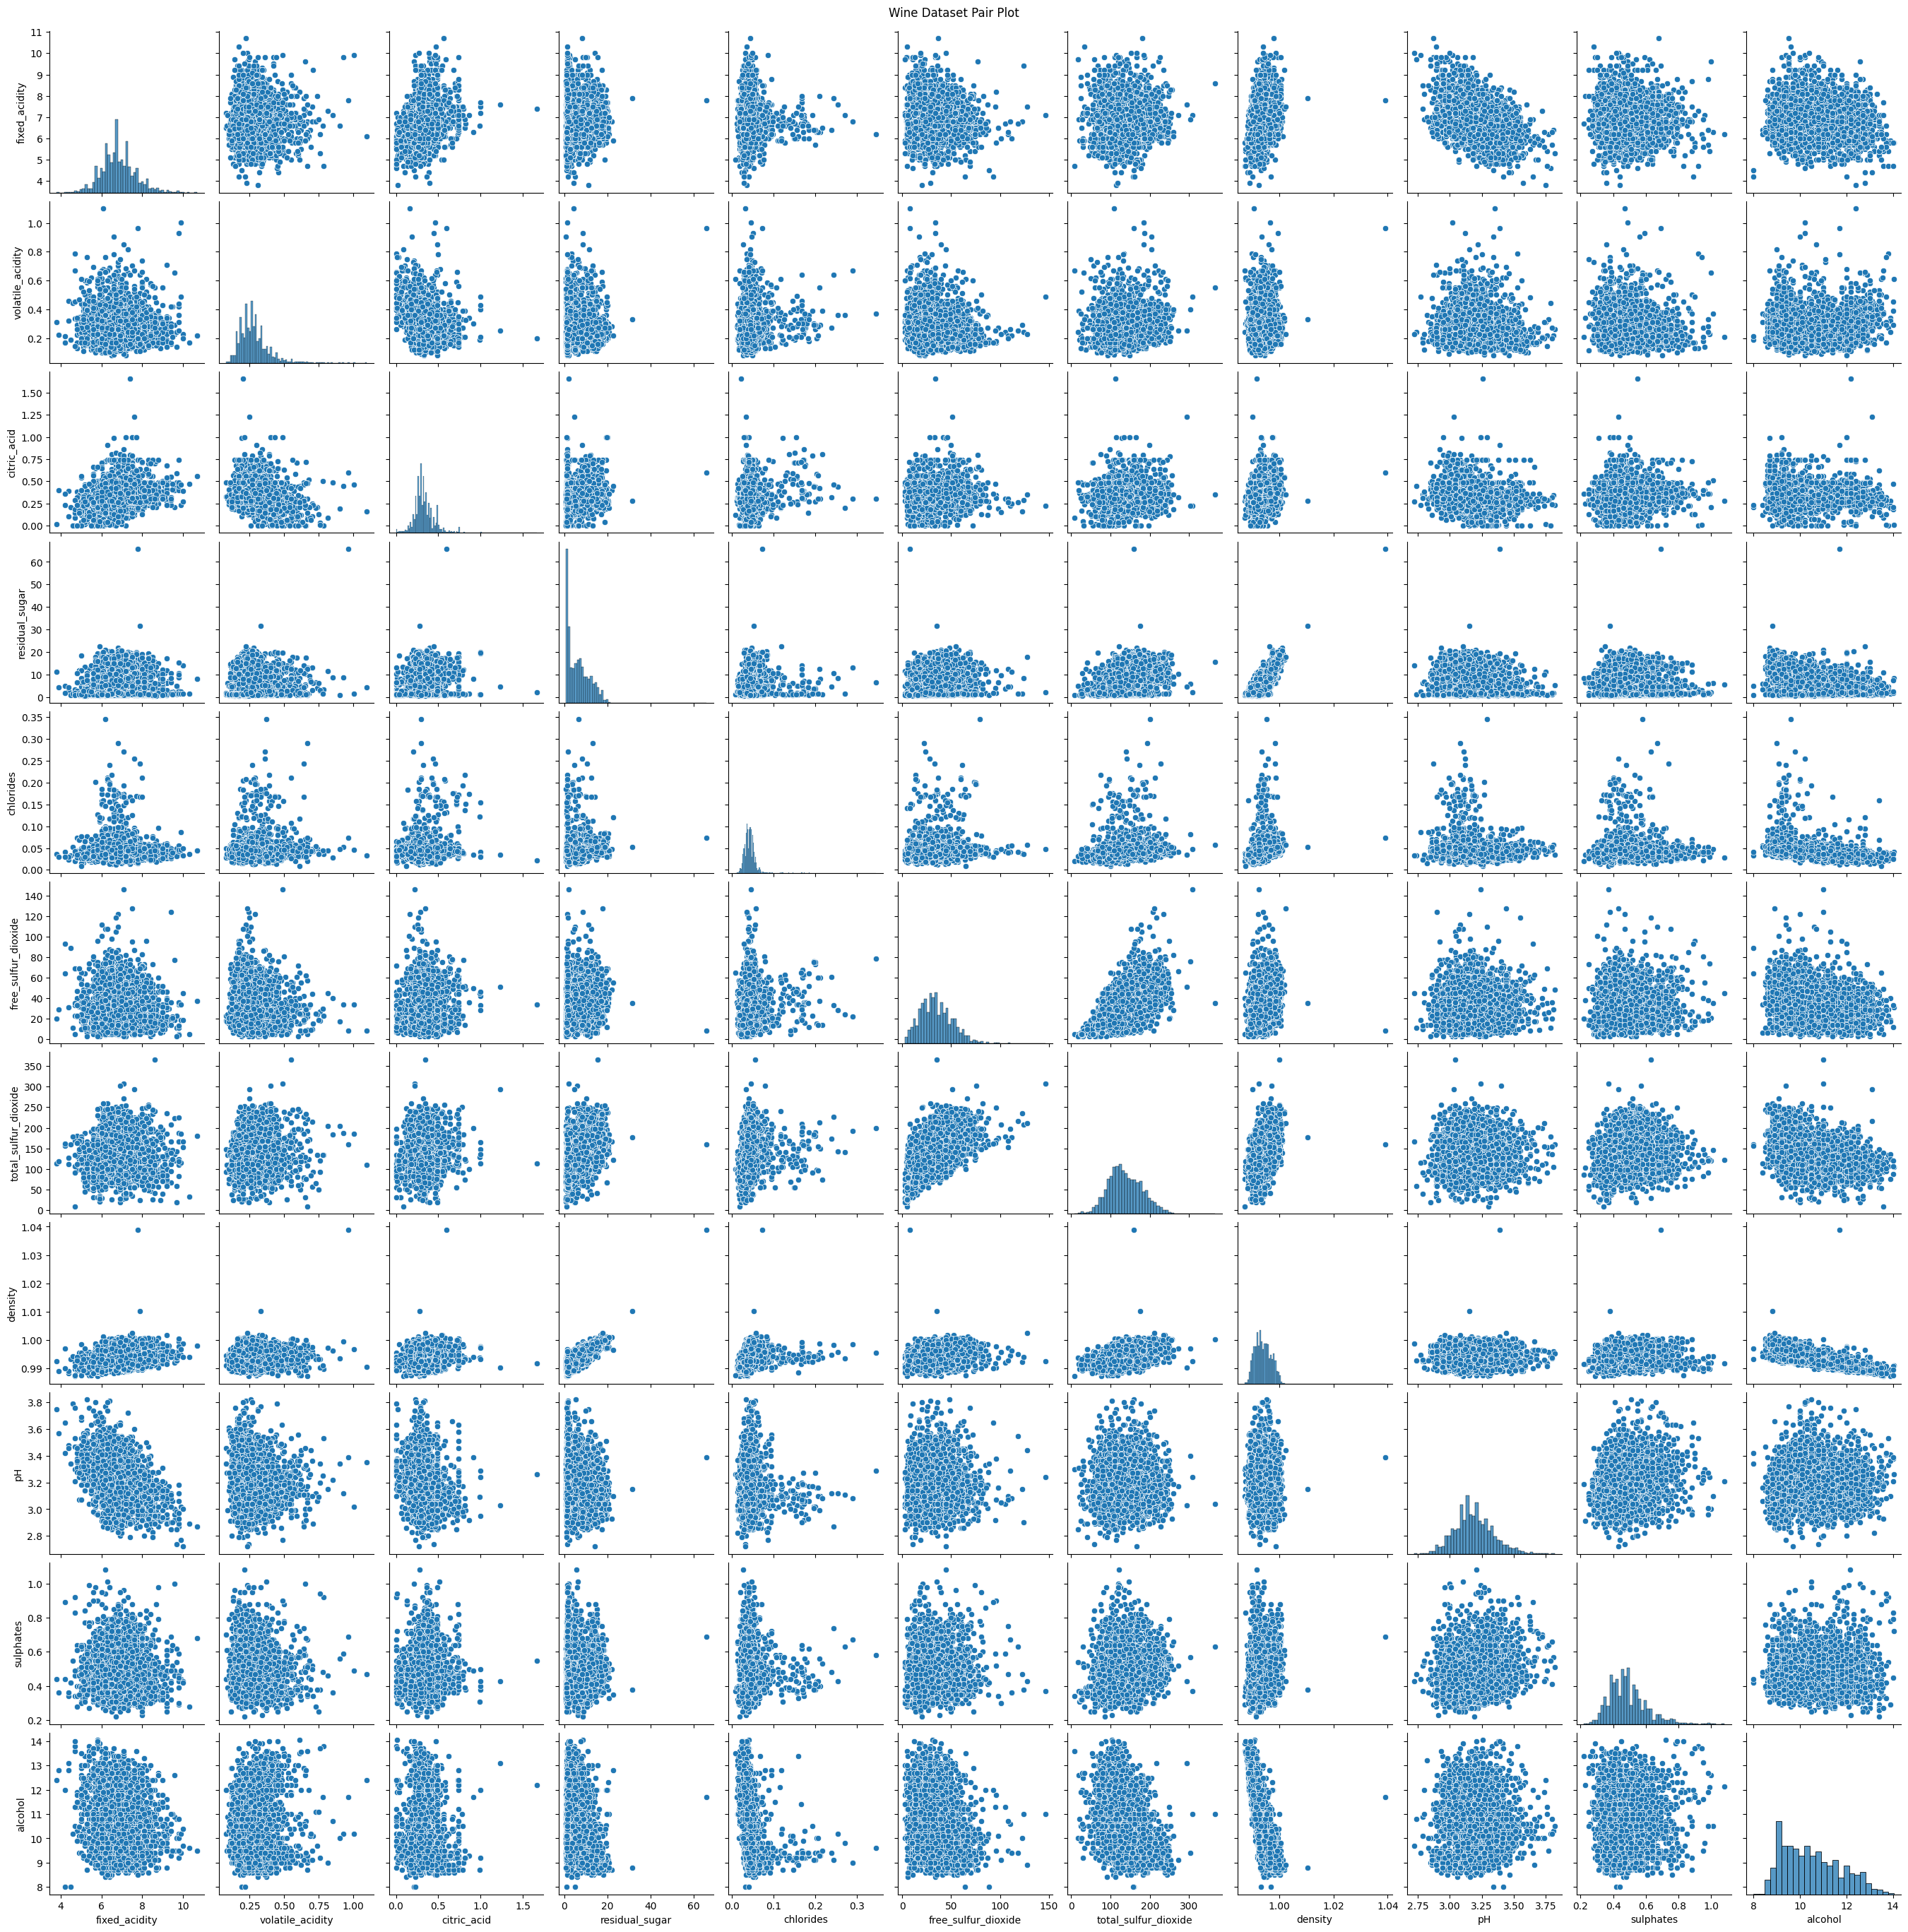

In [9]:
pairplot = sea.pairplot(train_X)
pairplot.fig.suptitle("Wine Dataset Pair Plot", y=1.00)

In [10]:
from sklearn.cluster import KMeans
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
from sklearn.manifold import Isomap
from sklearn.decomposition import KernelPCA

In [11]:
feature_names = train_X.columns
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
train_X = pd.DataFrame(train_X, columns = feature_names)

test_X = scaler.transform(test_X)
test_X = pd.DataFrame(test_X, columns = feature_names)
test_X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.552702,-0.874221,-0.521754,1.469343,0.509864,0.590724,0.399513,1.349250,-1.647180,-0.700579,-1.386407
1,-0.771705,-0.234085,-0.766966,-0.934197,-0.310331,6.198843,3.163819,0.158357,2.253153,0.361340,-0.736025
2,-0.530903,-0.480291,0.459094,-0.914496,-0.629295,-0.728834,-0.474670,-0.955380,0.864899,0.095860,1.052526
3,-0.049301,0.209087,0.132145,-0.717485,-0.355897,-1.508572,0.612152,-0.955380,-0.655570,0.361340,1.215122
4,-0.410503,1.489359,-0.194805,-0.559875,0.008634,-0.968753,0.115994,-1.284133,-0.258926,-1.320031,1.215122


Parameter: {'n_clusters': 2} Score 0.21357239831283353
Parameter: {'n_clusters': 3} Score 0.14637135465581688
Parameter: {'n_clusters': 4} Score 0.13188874407079162
Parameter: {'n_clusters': 5} Score 0.11585822503328376
Parameter: {'n_clusters': 10} Score 0.11011370204475947


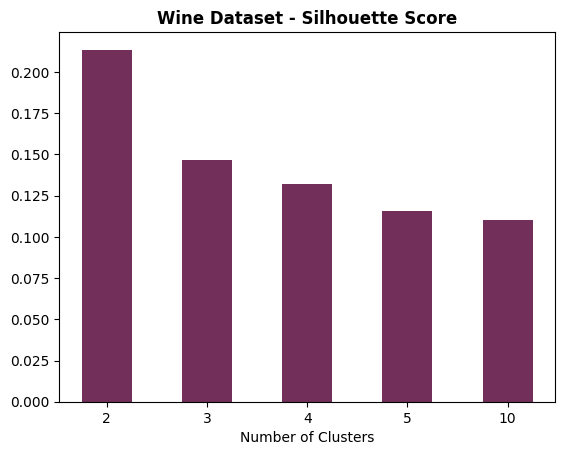

In [12]:
parameters = [2, 3, 4, 5, 10]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans(n_init="auto", random_state=0)     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)
    kmeans_model.fit(train_X)
    ss = silhouette_score(train_X, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Wine Dataset - Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

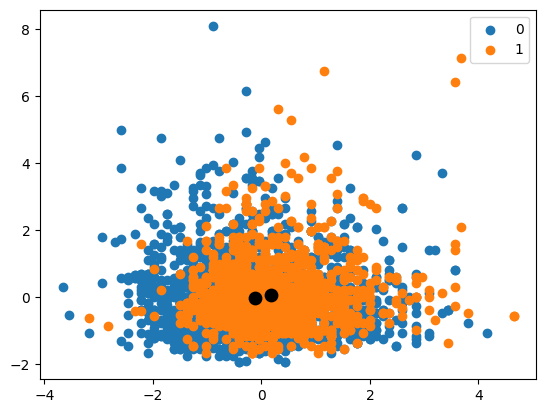

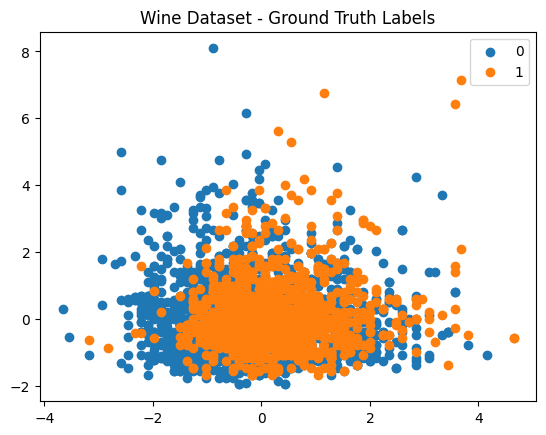

In [13]:
kmeans_model = KMeans(n_init="auto", n_clusters=2, random_state=0)
label = kmeans_model.fit_predict(train_X)
u_labels = np.unique(label)
centroids = kmeans_model.cluster_centers_

for i in u_labels:
  plt.scatter(train_X.values[label == i , 0] , train_X.values[label == i , 1] , label = i)
plt.scatter(centroids[:,0], centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()


u_labels = np.unique(train_Y)

for i in u_labels:
  plt.scatter(train_X.values[label == i , 0] , train_X.values[label == i , 1] , label = i)
plt.legend()
plt.title("Wine Dataset - Ground Truth Labels")
plt.show()

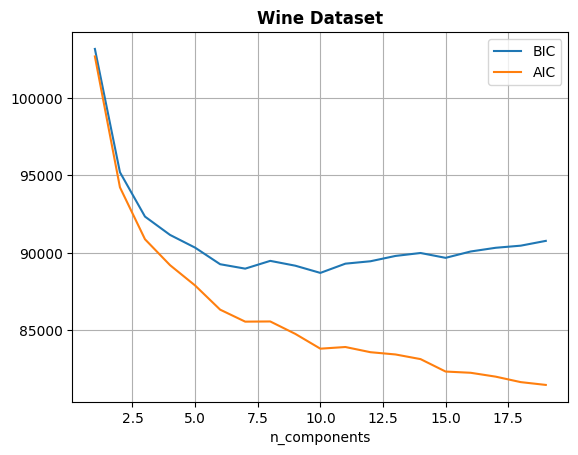

In [14]:
n_components = np.arange(1, 20)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(train_X)
          for n in n_components]

plt.plot(n_components, [m.bic(train_X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(train_X) for m in models], label='AIC')
plt.legend(loc='best')
plt.title('Wine Dataset', fontweight='bold')
plt.xlabel('n_components');
plt.grid(True)

[0.29334738 0.14177995 0.11055494 0.09319922 0.08972961 0.08499503
 0.06623713 0.05365109 0.03810085 0.0264612  0.0019436 ]


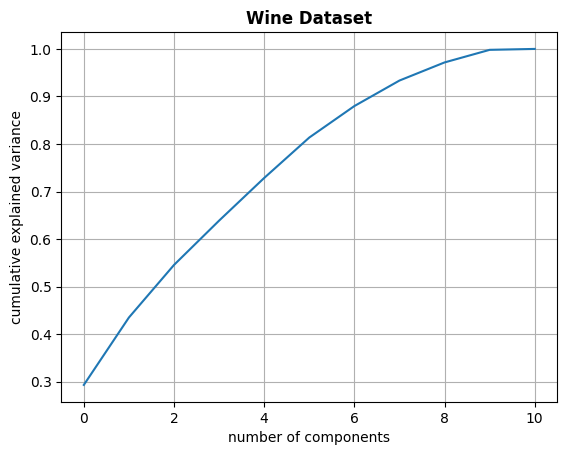

In [15]:
pca = PCA().fit(train_X)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Wine Dataset', fontweight='bold')
plt.grid(True)

Text(0.5, 1.0, 'Wine Dataset')

<Figure size 640x480 with 0 Axes>

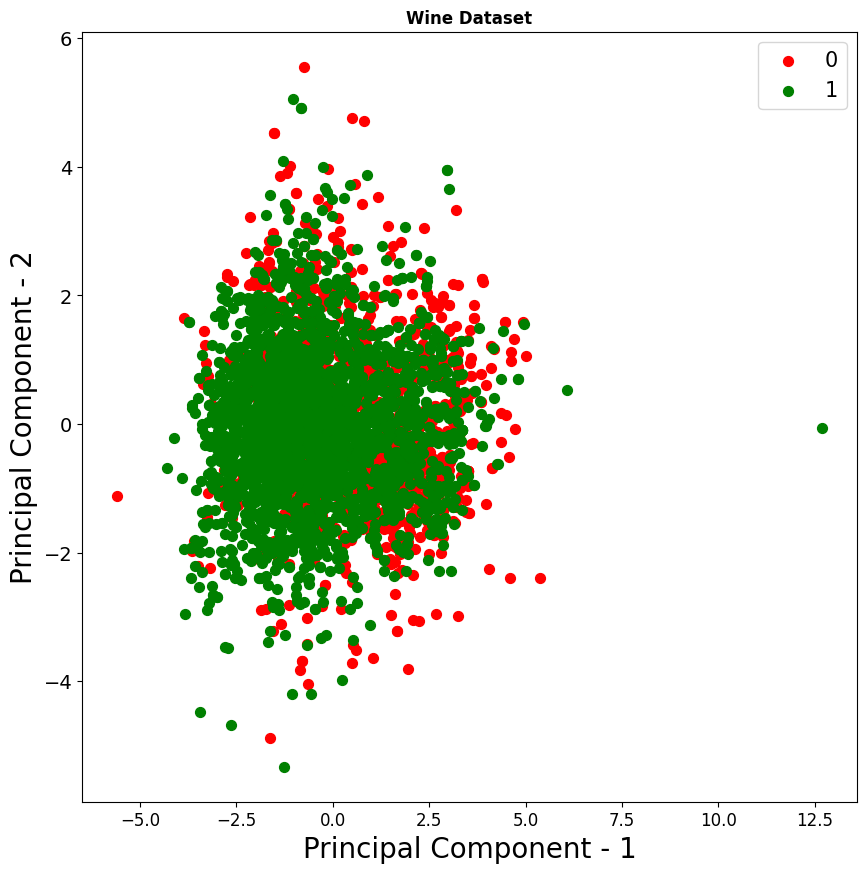

In [16]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(train_X)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = train_Y['quality'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.title('Wine Dataset', fontweight='bold')

In [17]:
# n_components_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# kurtosis_values = []
# for n_components in n_components_list:
#   ica = FastICA(n_components, whiten='unit-variance', max_iter=1000, tol=0.1, random_state=1)
#   ica.fit(train_X)
#   ica_components = ica.transform(train_X)
#   kurtosis_values.append(np.mean(abs(kurtosis(ica_components, axis=0))))

# sorted_components = [comp for _, comp in sorted(zip(kurtosis_values, range(1, len(kurtosis_values) + 1)), reverse=True)]

# # Create a Component vs Kurtosis plot
# plt.figure()
# plt.plot(n_components_list, kurtosis_values, marker='o')
# plt.xlabel('Number of Components')
# plt.ylabel('Kurtosis')
# plt.title('Wine Dataset - Component vs Kurtosis Plot')
# plt.grid(True)

# # Display the sorted components
# print(f"Components sorted by kurtosis: {sorted_components}")

# plt.show()

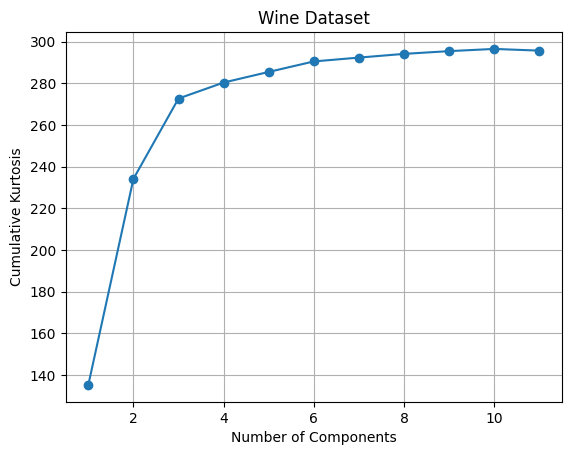

In [18]:
ica = FastICA(n_components=train_X.shape[1], whiten='unit-variance', max_iter=1000, tol=0.1, random_state=1)
ica.fit(train_X)
components = ica.transform(train_X)
kurtosis_values = np.apply_along_axis(lambda x: kurtosis(x), axis=0, arr=components)

# Sort components based on kurtosis
sorted_indices = np.argsort(kurtosis_values)[::-1]

# Calculate cumulative kurtosis
cumulative_kurtosis = np.cumsum(kurtosis_values[sorted_indices])

# Plot components vs cumulative kurtosis
plt.plot(range(1, len(cumulative_kurtosis) + 1), cumulative_kurtosis, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Kurtosis')
plt.title('Wine Dataset')
plt.grid(True)
plt.show()

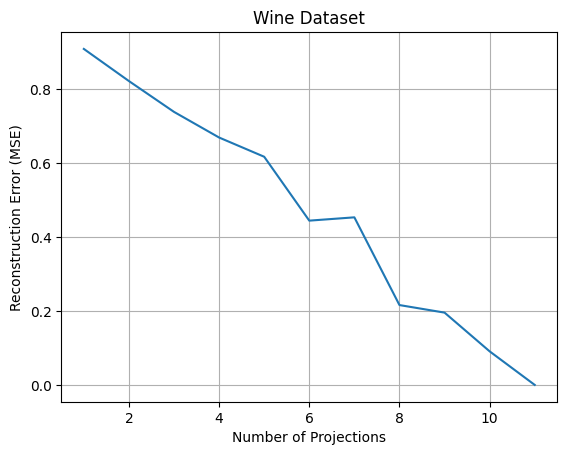

In [19]:
projection_errors = []
for n_projections in range(1, 12):
  random_projection = GaussianRandomProjection(n_components=n_projections)
  reduced_data = random_projection.fit_transform(train_X)
  # reconstructed_data = np.dot(reduced_data, random_projection.components_)
  reconstructed_data = random_projection.inverse_transform(reduced_data)
  # reconstructed_data = np.dot(reduced_data, np.linalg.pinv(random_projection.components_.T))
  mse = mean_squared_error(train_X, reconstructed_data)
  projection_errors.append(mse)

plt.plot(range(1, 12), projection_errors)
plt.xlabel('Number of Projections')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Wine Dataset')
plt.grid(True)
plt.show()

In [20]:
# projection_errors = []
# lowest_reconstruction_error = float('inf')
# n_components_range = range(1, 12)
# for n_components in n_components_range:
#   tsne = TSNE(n_components=n_components, method="exact", random_state=1)
#   tsne_data = tsne.fit_transform(train_X)
#   pairwise_distances_tsne = pairwise_distances(tsne_data, metric="euclidean")
#   original_distances = pairwise_distances(train_X, metric="euclidean")

#   mse = mean_squared_error(original_distances, pairwise_distances_tsne)
#   projection_errors.append(mse)

#   if mse < lowest_reconstruction_error:
#     best_n_components = n_components
#     lowest_reconstruction_error = mse

# plt.plot(n_components_range, projection_errors)
# plt.xlabel('Number of Projections')
# plt.ylabel('Reconstruction Error (MSE)')
# plt.title('Wine Dataset - t-SNE')
# plt.show()

best_n_components is: 1
lowest_reconstruction_error is 5.7935185792759385e-30


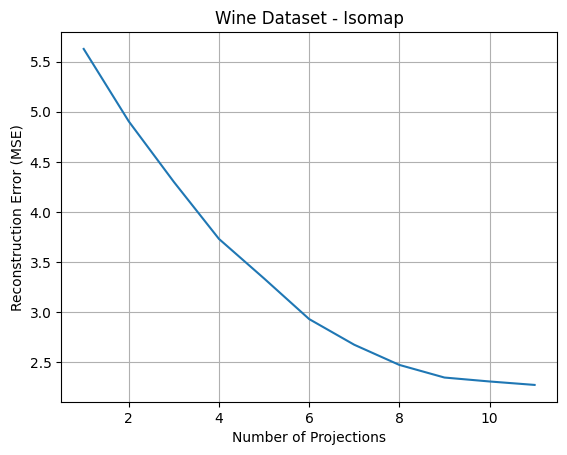

In [21]:
projection_errors = []
lowest_reconstruction_error = float('inf')
n_components_range = range(1, 12)
for n_components in n_components_range:
  isomap = Isomap(n_components=n_components, n_neighbors=30)
  isomap_data = isomap.fit_transform(train_X)
  projection_errors.append(isomap.reconstruction_error())

  if isomap.reconstruction_error() < lowest_reconstruction_error:
    best_n_components = n_components
    lowest_reconstruction_error = mse

print(f"best_n_components is: {best_n_components}")
print(f"lowest_reconstruction_error is {lowest_reconstruction_error}")
plt.plot(n_components_range, projection_errors)
plt.xlabel('Number of Projections')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Wine Dataset - Isomap')
plt.grid(True)
plt.show()

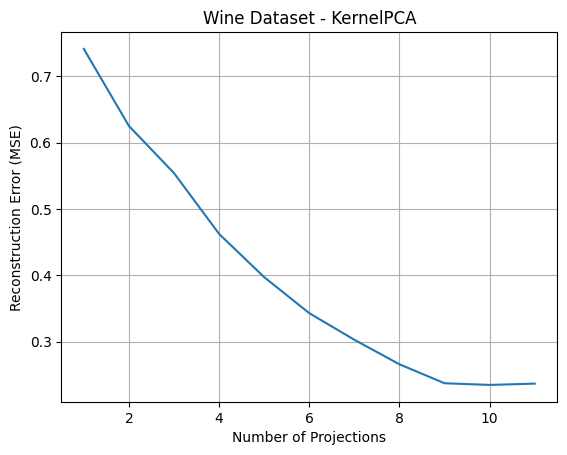

In [22]:
projection_errors = []
kernel = 'rbf'
gamma = 1.0
n_components_range = range(1, 12)
for n_components in n_components_range:
  kpca = KernelPCA(kernel=kernel, n_components=n_components, fit_inverse_transform=True)
  X_kpca = kpca.fit_transform(train_X)
  X_reconstructed = kpca.inverse_transform(X_kpca)
  mse = mean_squared_error(train_X, X_reconstructed)
  projection_errors.append(mse)

plt.plot(n_components_range, projection_errors)
plt.xlabel('Number of Projections')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Wine Dataset - KernelPCA')
plt.grid(True)
plt.show()

In [23]:
pca = PCA(n_components=7)
pca.fit(train_X)
train_X_pca = pca.transform(train_X)
print("original shape:   ", train_X.shape)
print("transformed shape:", train_X_pca.shape)

original shape:    (3916, 11)
transformed shape: (3916, 7)


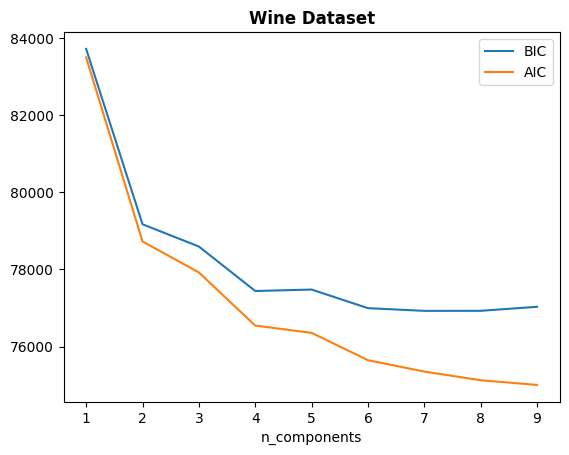

In [24]:
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(train_X_pca)
          for n in n_components]

plt.plot(n_components, [m.bic(train_X_pca) for m in models], label='BIC')
plt.plot(n_components, [m.aic(train_X_pca) for m in models], label='AIC')
plt.legend(loc='best')
plt.title('Wine Dataset', fontweight='bold')
plt.xlabel('n_components');

In [25]:
kpca = KernelPCA(kernel=kernel, n_components=9, fit_inverse_transform=False)
X_kpca = kpca.fit_transform(train_X)

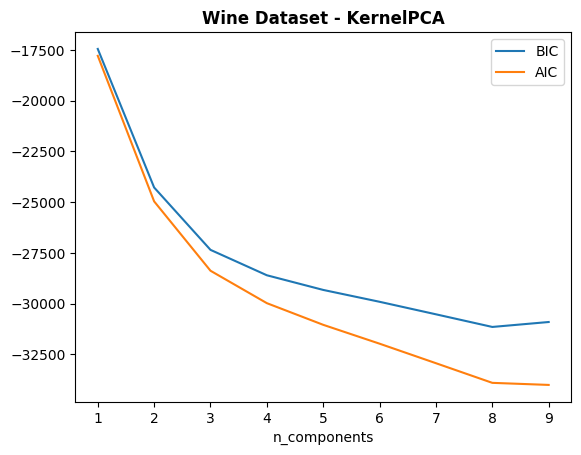

In [26]:
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_kpca)
          for n in n_components]

plt.plot(n_components, [m.bic(X_kpca) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_kpca) for m in models], label='AIC')
plt.legend(loc='best')
plt.title('Wine Dataset - KernelPCA', fontweight='bold')
plt.xlabel('n_components');

In [27]:
def plot_validation_curve(clf, X, y, param_name, param_range, model_name):
    train_scores, test_scores = validation_curve(clf, X, y,
                                                 cv=4,
                                                 scoring="accuracy",
                                                 param_name=param_name,
                                                 param_range=param_range,
                                                 n_jobs=-1)
    plt.figure(figsize=(6,4))
    x_range = param_range
    train_scores_mean =  np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(x_range, train_scores_mean, 'g-', label='Training score')
    plt.plot(x_range, test_scores_mean, 'b-', label='Validation score')
    plt.ylabel('Accuracy Score')
    plt.xlabel(model_name + ": "+ param_name)
    # plt.text(6, 0.8, 'Overfitting',fontsize=12,color="r")
    # plt.text(1, 0.8, 'Underfitting',fontsize=12,color="r")
    plt.legend()
    plt.grid(True)

In [45]:
random_projection = GaussianRandomProjection(n_components=9, random_state=0)
reduced_data = random_projection.fit_transform(train_X)
reduced_data_test = random_projection.fit_transform(test_X)

In [41]:
# ica = FastICA(6, whiten='unit-variance', max_iter=1000, tol=0.1, random_state=1)
# ica.fit(train_X)
# reduced_data = ica.transform(train_X)
# # ica.fit(test_X)
# reduced_data_test = ica.transform(test_X)

In [ ]:
!pip install scikeras tensorflow
from scikeras.wrappers import KerasClassifier

from keras.models import Sequential
from keras.layers import Dense
import keras
keras.utils.set_random_seed(2)

In [30]:
def buildclassifier():
    model = Sequential() #initialize NN
    print(train_X.shape[1])
    # model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', kernel_regularizer=keras.regularizers.l1(0.01), bias_regularizer=keras.regularizers.l1(0.01), activity_regularizer=keras.regularizers.l1(0.01), input_dim =train_X.shape[1]))
    model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim =reduced_data.shape[1]))
    # model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', kernel_regularizer=keras.regularizers.l1(0.01), bias_regularizer=keras.regularizers.l1(0.01), activity_regularizer=keras.regularizers.l1(0.01)))
    model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
    # model.add(Dense(units = 12, kernel_initializer = 'uniform',activation = 'relu', kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01)))
    # model.add(Dense(units = 8, kernel_initializer = 'uniform',activation = 'relu', kernel_regularizer=keras.regularizers.l1(0.01), bias_regularizer=keras.regularizers.l1(0.01), activity_regularizer=keras.regularizers.l1(0.01)))
    model.add(Dense(units = 5, kernel_initializer = 'uniform',activation = 'relu'))
    # model.add(Dense(units = 4, kernel_initializer = 'uniform',activation = 'relu'))
    # model.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid', kernel_regularizer=keras.regularizers.l1(0.01), bias_regularizer=keras.regularizers.l1(0.01), activity_regularizer=keras.regularizers.l1(0.01)))
    model.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid'))

    # print(model.summary())
    return model


11


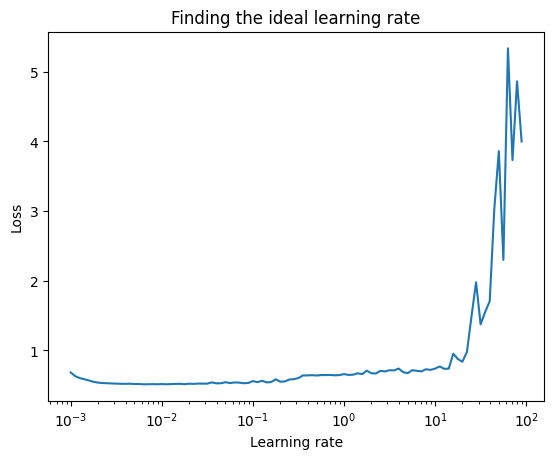

In [46]:
model = buildclassifier()
optimizer = keras.optimizers.Adam()
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
history = model.fit(reduced_data, train_Y.values, validation_split=0.2, epochs=100, batch_size = 32, verbose=0, callbacks=[lr_scheduler]);
lrs = 1e-3 * (10**(np.arange(100)/20))
plt.semilogx(lrs, history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");
plt.show()

11
31/31 [==============================] - 0s 7ms/step - loss: 0.5166 - accuracy: 0.7612


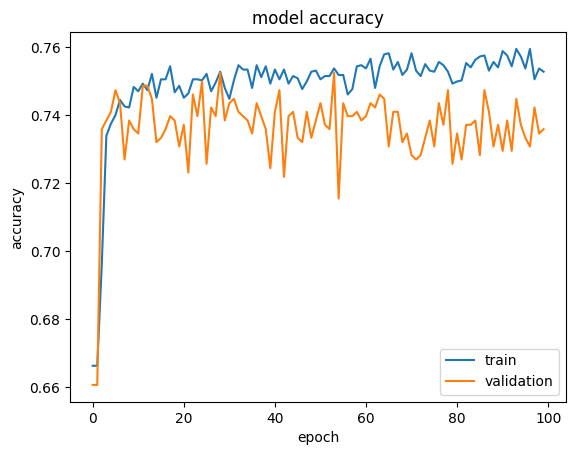

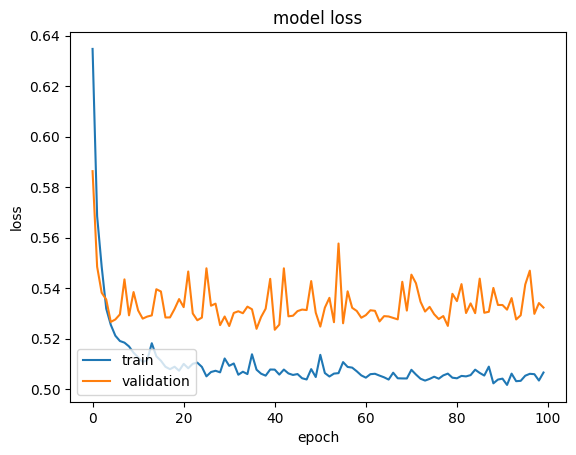

In [32]:
model = buildclassifier()
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(reduced_data, train_Y, validation_split=0.2, epochs=100, batch_size = 64, verbose=0);
loss, accuracy = model.evaluate(reduced_data_test, test_Y)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()


11
31/31 [==============================] - 0s 2ms/step


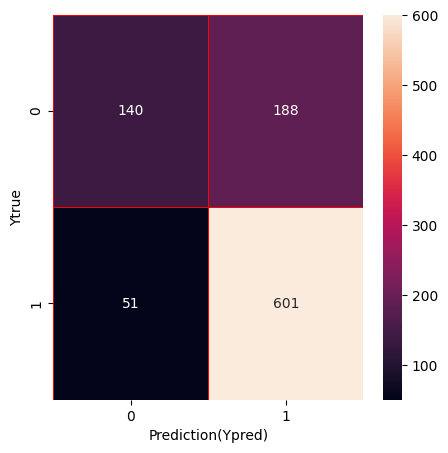

              precision    recall  f1-score   support

 Low Quality     0.7330    0.4268    0.5395       328
High Quality     0.7617    0.9218    0.8341       652

    accuracy                         0.7561       980
   macro avg     0.7474    0.6743    0.6868       980
weighted avg     0.7521    0.7561    0.7355       980



In [33]:
model = buildclassifier()
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(reduced_data, train_Y, validation_split=0.2, epochs=50, batch_size = 32, verbose=0);

Y_pred = model.predict(reduced_data_test)
Y_pred = np.around(Y_pred)
CM = confusion_matrix(test_Y, Y_pred)
f, ax = plt.subplots(figsize=(5,5))
sea.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

print(classification_report(test_Y, Y_pred,
                            digits = 4,
                            target_names=["Low Quality", "High Quality"]))




In [34]:
kpca = KernelPCA(kernel=kernel, n_components=9, fit_inverse_transform=False)
X_kpca = kpca.fit_transform(train_X)
X_kpca_test = kpca.fit_transform(test_X)

In [35]:
def buildclassifier():
    model = Sequential() #initialize NN
    print(train_X.shape[1])
    # model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', kernel_regularizer=keras.regularizers.l1(0.01), bias_regularizer=keras.regularizers.l1(0.01), activity_regularizer=keras.regularizers.l1(0.01), input_dim =train_X.shape[1]))
    model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim =X_kpca.shape[1]))
    # model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', kernel_regularizer=keras.regularizers.l1(0.01), bias_regularizer=keras.regularizers.l1(0.01), activity_regularizer=keras.regularizers.l1(0.01)))
    model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
    # model.add(Dense(units = 12, kernel_initializer = 'uniform',activation = 'relu', kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01)))
    # model.add(Dense(units = 8, kernel_initializer = 'uniform',activation = 'relu', kernel_regularizer=keras.regularizers.l1(0.01), bias_regularizer=keras.regularizers.l1(0.01), activity_regularizer=keras.regularizers.l1(0.01)))
    model.add(Dense(units = 5, kernel_initializer = 'uniform',activation = 'relu'))
    # model.add(Dense(units = 4, kernel_initializer = 'uniform',activation = 'relu'))
    # model.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid', kernel_regularizer=keras.regularizers.l1(0.01), bias_regularizer=keras.regularizers.l1(0.01), activity_regularizer=keras.regularizers.l1(0.01)))
    model.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid'))

    # print(model.summary())
    return model

11


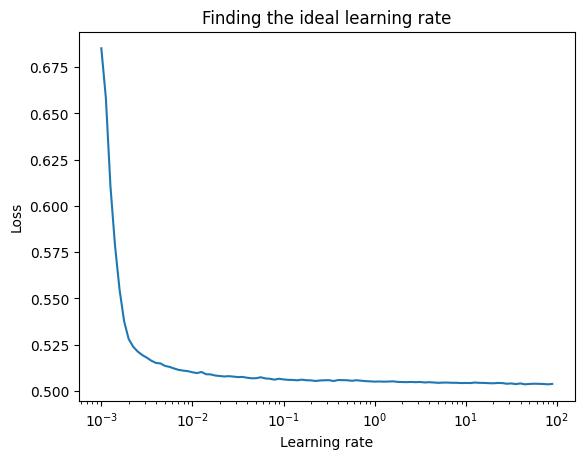

In [36]:
model = buildclassifier()
optimizer = keras.optimizers.Adam()
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
history = model.fit(X_kpca, train_Y, validation_split=0.2, epochs=100, batch_size = 32, verbose=0);
lrs = 1e-3 * (10**(np.arange(100)/20))
plt.semilogx(lrs, history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");
plt.show()

11


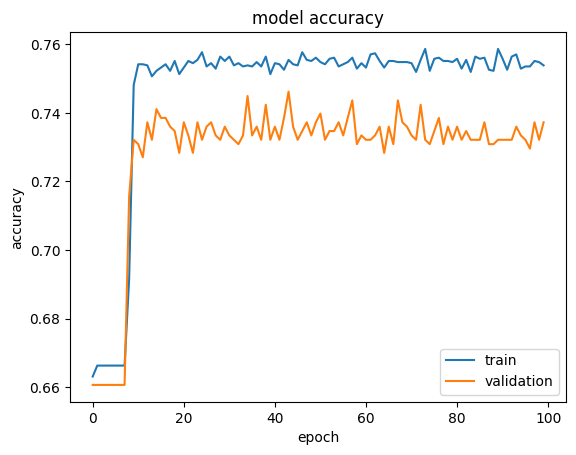

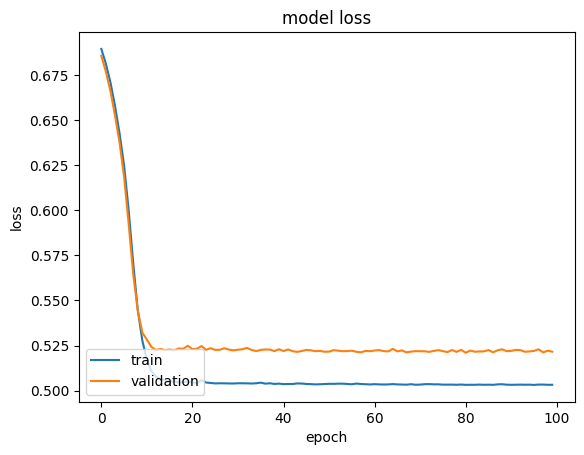

In [37]:
model = buildclassifier()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_kpca, train_Y, validation_split=0.2, epochs=100, batch_size = 64, verbose=0);
# loss, accuracy = model.evaluate(X_kpca_test, test_Y)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()

11
31/31 [==============================] - 0s 2ms/step


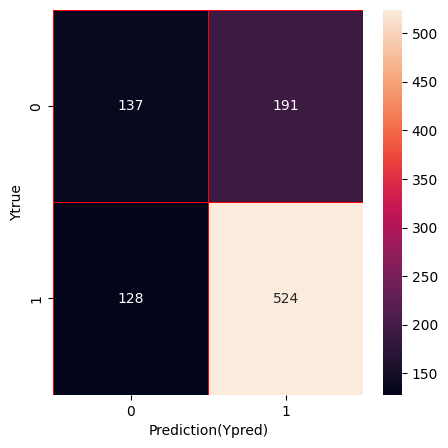

              precision    recall  f1-score   support

 Low Quality     0.5170    0.4177    0.4621       328
High Quality     0.7329    0.8037    0.7666       652

    accuracy                         0.6745       980
   macro avg     0.6249    0.6107    0.6143       980
weighted avg     0.6606    0.6745    0.6647       980



In [38]:
model = buildclassifier()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_kpca, train_Y, validation_split=0.2, epochs=50, batch_size = 32, verbose=0);

Y_pred = model.predict(X_kpca_test)
Y_pred = np.around(Y_pred)
CM = confusion_matrix(test_Y, Y_pred)
f, ax = plt.subplots(figsize=(5,5))
sea.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

print(classification_report(test_Y, Y_pred,
                            digits = 4,
                            target_names=["Low Quality", "High Quality"]))